In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Evaluating INQUIRE Benchmarks

Here we will evaluate the raw query metrics returned by INQUIRE_benchmark. These raw metrics were calculated using [INQUIRE-Benchmark-small](https://huggingface.co/datasets/sagecontinuum/INQUIRE-Benchmark-small) with our [Hybrid Search](../HybridSearch_example/). To better understand the results, each image is matched with a query in the dataset. Although not all matched images are relevant to the query.
>NOTE: INQUIRE also provies a [leaderboard](https://inquire-benchmark.github.io/). This is helpful for comparing our results.

## Query and Image Collection Process

This explanation was grabbed from the [INQUIRE paper](https://arxiv.org/abs/2411.02537) so that we can better understand the results in further sections

### Query Collection
To ensure that INQUIRE comprises text queries that are relevant to scientists,
we conducted interviews with individuals across different ecological and environmental domains -
including experts in ornithology, marine biology, entomology, and forestry. Further queries were
sourced from reviews of academic literature in ecology . Representative queries and statistics can
be seen in Figures 1, 2, and 3. We retained only queries that (1) could be discerned from images
alone, (2) were feasible to comprehensively label over the entire iNat24 dataset, and (3) were of
interest to domain experts.
### Image Annotation 
All image annotations were performed by a small set of individuals whose
interest and familiarity with wildlife image collections enabled them to provide accurate labels for
challenging queries. Annotators were instructed to label all candidate images as either relevant (i.e.,
positive match) or not relevant (i.e., negative match) to a query, and to mark an image as not relevant
if there was reasonable doubt. To allow for comprehensive labeling, where applicable, iNat24 species
labels were used to narrow down the search to a sufficiently small size to label all relevant images for
the query of interest. For queries in which species labels could not be used, labeling was performed
over the top CLIP ViT-H-14 retrievals alone. In this case, the resulting annotations were only
kept if we were certain that this labeling captured the vast majority of positives, including labeling
until at least 100 consecutive retrievals were not relevant (see Appendix H). Queries that were deemed
too easy, not comprehensively labeled, or otherwise not possible to label were excluded from our
benchmark. In total, this process resulted in 250 queries which involved labeling 194,334 images, of
which 32,696 were relevant to their query.
### Query Categories
Each query belongs to one of four supercategories (appearance, behavior,
context, or species), and further into one of sixteen fine-grained categories (e.g., Animal Structures
and Habitats). Figure 2 shows the distribution of query categories, and Figure 3 shows the distribution
of iconic groups of the species represented by each query (e.g., Mammals, Birds). We also note
queries that use scientific terminology, words typically used only within scientific contexts (e.g., “A
godwit performing distal rhynchokinesis”).
### Data Split
We divide all queries into 50 validation and 200 test queries using a random split,
stratified by category.

## Overall Metrics
First, we will begin with evaluating all queries. 

In [22]:
#load in metric data
df = pd.read_csv('query_eval_metrics.csv')
df

,query_id,query,total_images,correctly_returned,incorrectly_returned,relevant_images,non_relevant_images,accuracy,precision,recall,NDCG,clip_NDCG,category,supercategory,iconic_group
0,11,A mongoose standing upright alert,3,3,0,3.0,0.0,1.000000,1.000000,0.115385,1.000000,1.00000,Defensive and Survival Behaviors,Behavior,Mammals
1,189,puffins carrying food,1,1,0,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.00000,Feeding and Hydration,Behavior,Birds
2,6,A female pheasant,1,1,0,1.0,0.0,1.000000,1.000000,0.024390,0.000000,0.00000,Sex identification,Appearance,Birds
3,32,Dead hog-nosed skunk,2,2,0,1.0,1.0,1.000000,0.500000,0.033333,1.000000,1.00000,Health and Disease,Appearance,Mammals
4,66,Mushrooms growing in a fairy ring formation,1,1,0,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.00000,Miscellaneous Context,Context,Fungi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,152,feral cat with prey,2,2,0,1.0,1.0,1.000000,0.500000,0.071429,1.000000,1.00000,Feeding and Hydration,Behavior,Mammals
156,43,Fur seal mother with pup,4,4,0,2.0,2.0,1.000000,0.500000,0.068966,0.693426,1.00000,Cooperative and Social Behaviors,Behavior,Mammals
157,47,Haliaeetus eagles in aerial cartwheeling fligh...,2,2,0,0.0,2.0,1.000000,0.000000,0.000000,0.000000,0.00000,"Mating, Courtship, Reproduction",Behavior,Birds
158,0,A By-the-Wind Sailor washed up on a beach,2,1,1,0.0,2.0,0.500000,0.000000,0.000000,0.000000,0.00000,Health and Disease,Appearance,Animalia


Each row in the dataframe is evaluating a query used in our image search system:
- **query_id**: an ID given to each unique query in the dataset
- **query**: The query inserted into our image search. These are the same queries created by the INQUIRE authors.
- **total_images**: The total images returned from our image search using the specified query.
- **correctly_returned**: The number of images returned that matched with the query indicated in the dataset. For example, if the query was "apple" for the image in the dataset and I used the query "apple" in our image search system. The image returned would be marked as correctly returned since the queries matched.
- **incorrectly_returned**: The number of images returned that did NOT match with the query in the dataset. Using the example above, if we used the query "banana" in our image search system and the image retured had a query of "apple" in the dataset then this will be marked as incorreclt returned.
- **relevant_images**: The number of images returned marked as relevant. Each image in the dataset is marked as relevant or nonrelavent to the query it is matched with.
- **non_relevant_images**: The number of images returned marked as nonrelevant. Each image in the dataset is marked as relevant or nonrelavent to the query it is matched with.
- **accuracy**: The number of images correctly returned compared to the total images. 
- **precision**: The number of relevant images returned compared to the total images.
- **recall**: The number of relevant images returned compared to the number of relevant images in the dataset.
- **NDCG**: A metric used to evaluate a rerank model. A higher score means relevant images were given a higher score than nonrelevant images.
- **clip_NDCG**: NDCG was also calculated for the clip scores given in the dataset. This column can be used as a comparison to the column NDCG. CLIP ViT-H-14 was used by the INQUIRE authors to provide a rerank score for each image. If NDCG is higher than this column, that means our image search system is doing better. 
- **category**: The category given to the query by the INQUIRE authors. (ex; Defensive and Survival Behaviors)
- **supercategory**: The supercategory given the the query by the INQUIRE authors. (ex; Behavior)
- **iconic_group**: The iconic group given to the query by the INQUIRE authors. (ex; Mammals)


In [ ]:
#calculate the average/sum of each metric
total_images = df['total_images'].sum()
correctly_returned = df['correctly_returned'].sum()
incorrectly_returned = df['incorrectly_returned'].sum()
relevant_images = df['relevant_images'].sum()
non_relevant_images = df['non_relevant_images'].sum()
accuracy = df['accuracy'].mean()
precision = df['precision'].mean()
recall = df['recall'].mean()
ndcg = df['NDCG'].mean()
clip_ndcg = df['clip_NDCG'].mean()

# Summary of key metrics
overall_summary = {
    'Total Images': total_images,
    'Correctly Returned': correctly_returned,
    'Incorrectly Returned': incorrectly_returned,
    'Relevant Images': relevant_images,
    'Non-Relevant Images': non_relevant_images,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'NDCG': ndcg,
    'Clip NDCG': clip_ndcg
}


In [ ]:
# Print the summary
for key, value in overall_summary.items():
    print(f"{key}: {value}")

# Insights
print("\nInsights:")
print(f"The system returned a total of {correctly_returned} correct images out of {total_images} total images returned.")
print(f"The accuracy of the system is {accuracy:.4f}, indicating that {accuracy*100:.2f}% of the returned images correctly matched with the query.")
print(f"The precision of the system is {precision:.4f}, indicating that {precision*100:.2f}% of the total images returned were relevant images.")
print(f"The recall of the system is {recall:.4f}, indicating that {recall*100:.2f}% of the total relevant images in the dataset were returned.")
print(f"The NDCG score is {ndcg:.4f}, and the Clip NDCG score is {clip_ndcg:.4f}, indicating the ranking quality of the returned images against the base CLIP ViT-H-14 the INQUIRE authors used.")

## Metrics based on Supercategory

Now, we will evaluate queries based on their categories. 


In [29]:
# Group by category and calculate the sum/mean of each metric
supercategory_metrics = df.groupby('supercategory').agg({
    'total_images': 'sum',
    'correctly_returned': 'sum',
    'incorrectly_returned': 'sum',
    'relevant_images': 'sum',
    'non_relevant_images': 'sum',
    'accuracy': 'mean',
    'precision': 'mean',
    'recall': 'mean',
    'NDCG': 'mean',
    'clip_NDCG': 'mean'
}).reset_index()

supercategory_metrics

,supercategory,total_images,correctly_returned,incorrectly_returned,relevant_images,non_relevant_images,accuracy,precision,recall,NDCG,clip_NDCG
0,Appearance,129,88,41,36.0,93.0,0.630128,0.292308,0.082145,0.302981,0.291550
1,Behavior,162,134,28,59.0,103.0,0.835169,0.392655,0.071275,0.411840,0.485176
2,Context,112,74,38,37.0,75.0,0.710853,0.300388,0.058784,0.377958,0.421661
3,Species,38,30,8,13.0,25.0,0.662202,0.263393,0.073877,0.596264,0.754104


### Images Returned

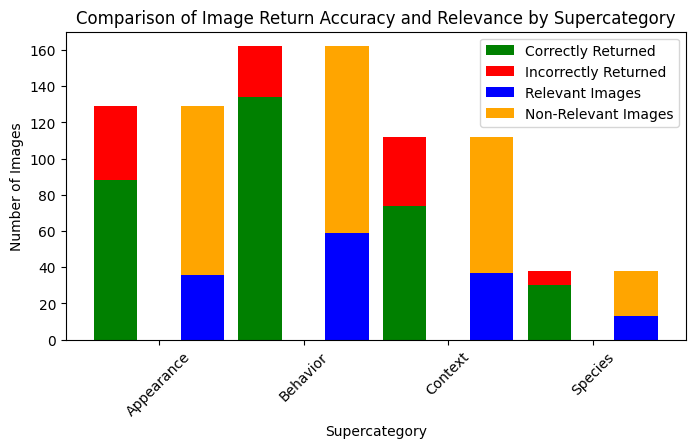

In [38]:
# plotting
x = np.arange(len(supercategory_metrics))  # Positions for bars
bar_width = 0.3
fig, ax = plt.subplots(figsize=(8, 4))

# Stacked bars for correctly and incorrectly returned images
ax.bar(x - bar_width, supercategory_metrics['correctly_returned'], label="Correctly Returned", color="green", width=bar_width)
ax.bar(x - bar_width, supercategory_metrics['incorrectly_returned'], bottom=supercategory_metrics['correctly_returned'], label="Incorrectly Returned", color="red", width=bar_width)

# Stacked bars for relevant and non-relevant images
ax.bar(x + bar_width, supercategory_metrics['relevant_images'], label="Relevant Images", color="blue", width=bar_width)
ax.bar(x + bar_width, supercategory_metrics['non_relevant_images'], bottom=supercategory_metrics['relevant_images'], label="Non-Relevant Images", color="orange", width=bar_width)

# Labels and title
ax.set_ylabel("Number of Images")
ax.set_xlabel("Supercategory")
ax.set_title("Comparison of Image Return Accuracy and Relevance by Supercategory")
ax.set_xticks(x)
ax.set_xticklabels(supercategory_metrics['supercategory'], rotation=45)
ax.legend()

# Display plot
plt.show()


### Accuracy

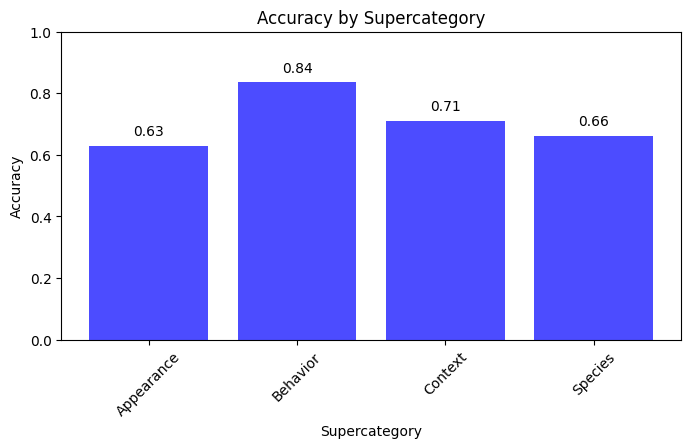

In [39]:
fig, ax = plt.subplots(figsize=(8, 4))

bars = ax.bar(supercategory_metrics['supercategory'], supercategory_metrics['accuracy'], color="blue", alpha=0.7)

ax.set_ylabel("Accuracy")
ax.set_xlabel("Supercategory")
ax.set_title("Accuracy by Supercategory")
ax.set_ylim(0, 1)  # Accuracy is between 0 and 1

# Add labels directly on bars
ax.bar_label(bars, fmt="%.2f", padding=5)

plt.xticks(rotation=45)
plt.show()

In [ ]:
### Precision